In [1]:
''' statements to import libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from IPython.display import display, HTML

In [89]:
'''Adding white wine DF.
Copying white_df to white_copy
cleaning data - removing column title spaces
cleaning data - removing duplicates
'''
white_df = pd.read_csv('wine+quality/winequality-white.csv', sep = ';')

white_copy = white_df.copy()
white_copy.columns = white_copy.columns.str.replace(' ', '_')
white_copy['good_or_bad'] = white_copy.quality.apply(lambda value: 'bad' if value <= 5 else 'good')

white_copy['quality_label'] = white_copy.quality.apply(lambda value: 'low' if value < 5 else 'medium' if value <= 7 else 'high')
white_copy.quality_label = pd.Categorical(white_copy.quality_label, ['low', 'medium', 'high'])
white_copy = white_copy.drop_duplicates()


print(white_copy.shape)

white_color= '#c1a43c'
red_color = '#991b1b'
background_grey = '#ede6e6'

(3961, 14)


/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

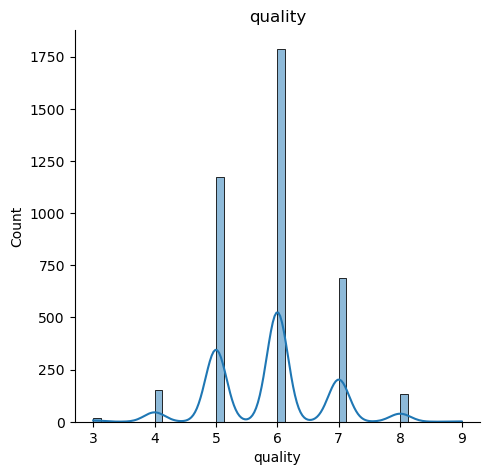

In [7]:
''' lets see the break down of wines by quality'''
def dist_plot(df_column_name):
    plt.figure(figsize= (10,8))
    sns.displot(df_column_name, kde =True)
    plt.title(f'{df_column_name.name}')
    plt.subplots_adjust(top = 0.9)
    plt.show()
    
dist_plot(white_copy.quality)

good_or_bad
good    2608
bad     1347
Name: count, dtype: int64

['good 2608', 'bad 1347']


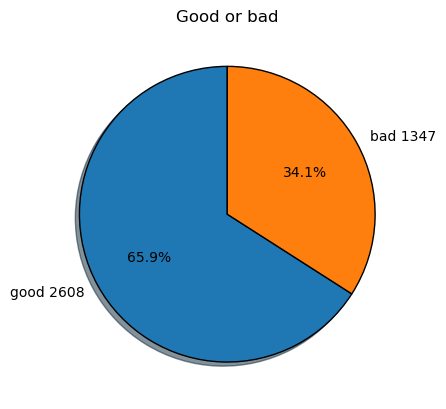

In [81]:
''' lets clarify it by a pie chart to break down proportion of good : bad wine'''
display(white_copy.good_or_bad.value_counts())

labelss = [f'{index} {value}' for index, value in white_copy.good_or_bad.value_counts().items()]
print(labelss)
plt.pie(white_copy.good_or_bad.value_counts(), labels =  labelss ,autopct='%1.1f%%', startangle=90, wedgeprops=dict(edgecolor='black'), shadow = True)
# plt.pie(white_copy.good_or_bad.value_counts(), labels = [({index} {value}) for index, value in white_copy.good_or_bad.value_counts().items()] ,autopct='%1.1f%%', startangle=90, wedgeprops=dict(edgecolor='black'), shadow = True)
#labels =  f'{index} ({value})' for index, value in white_copy.good_or_bad.value_counts().index 
#plt.legend(labels, loc='upper left')
plt.title('Good or bad')
plt.show()

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


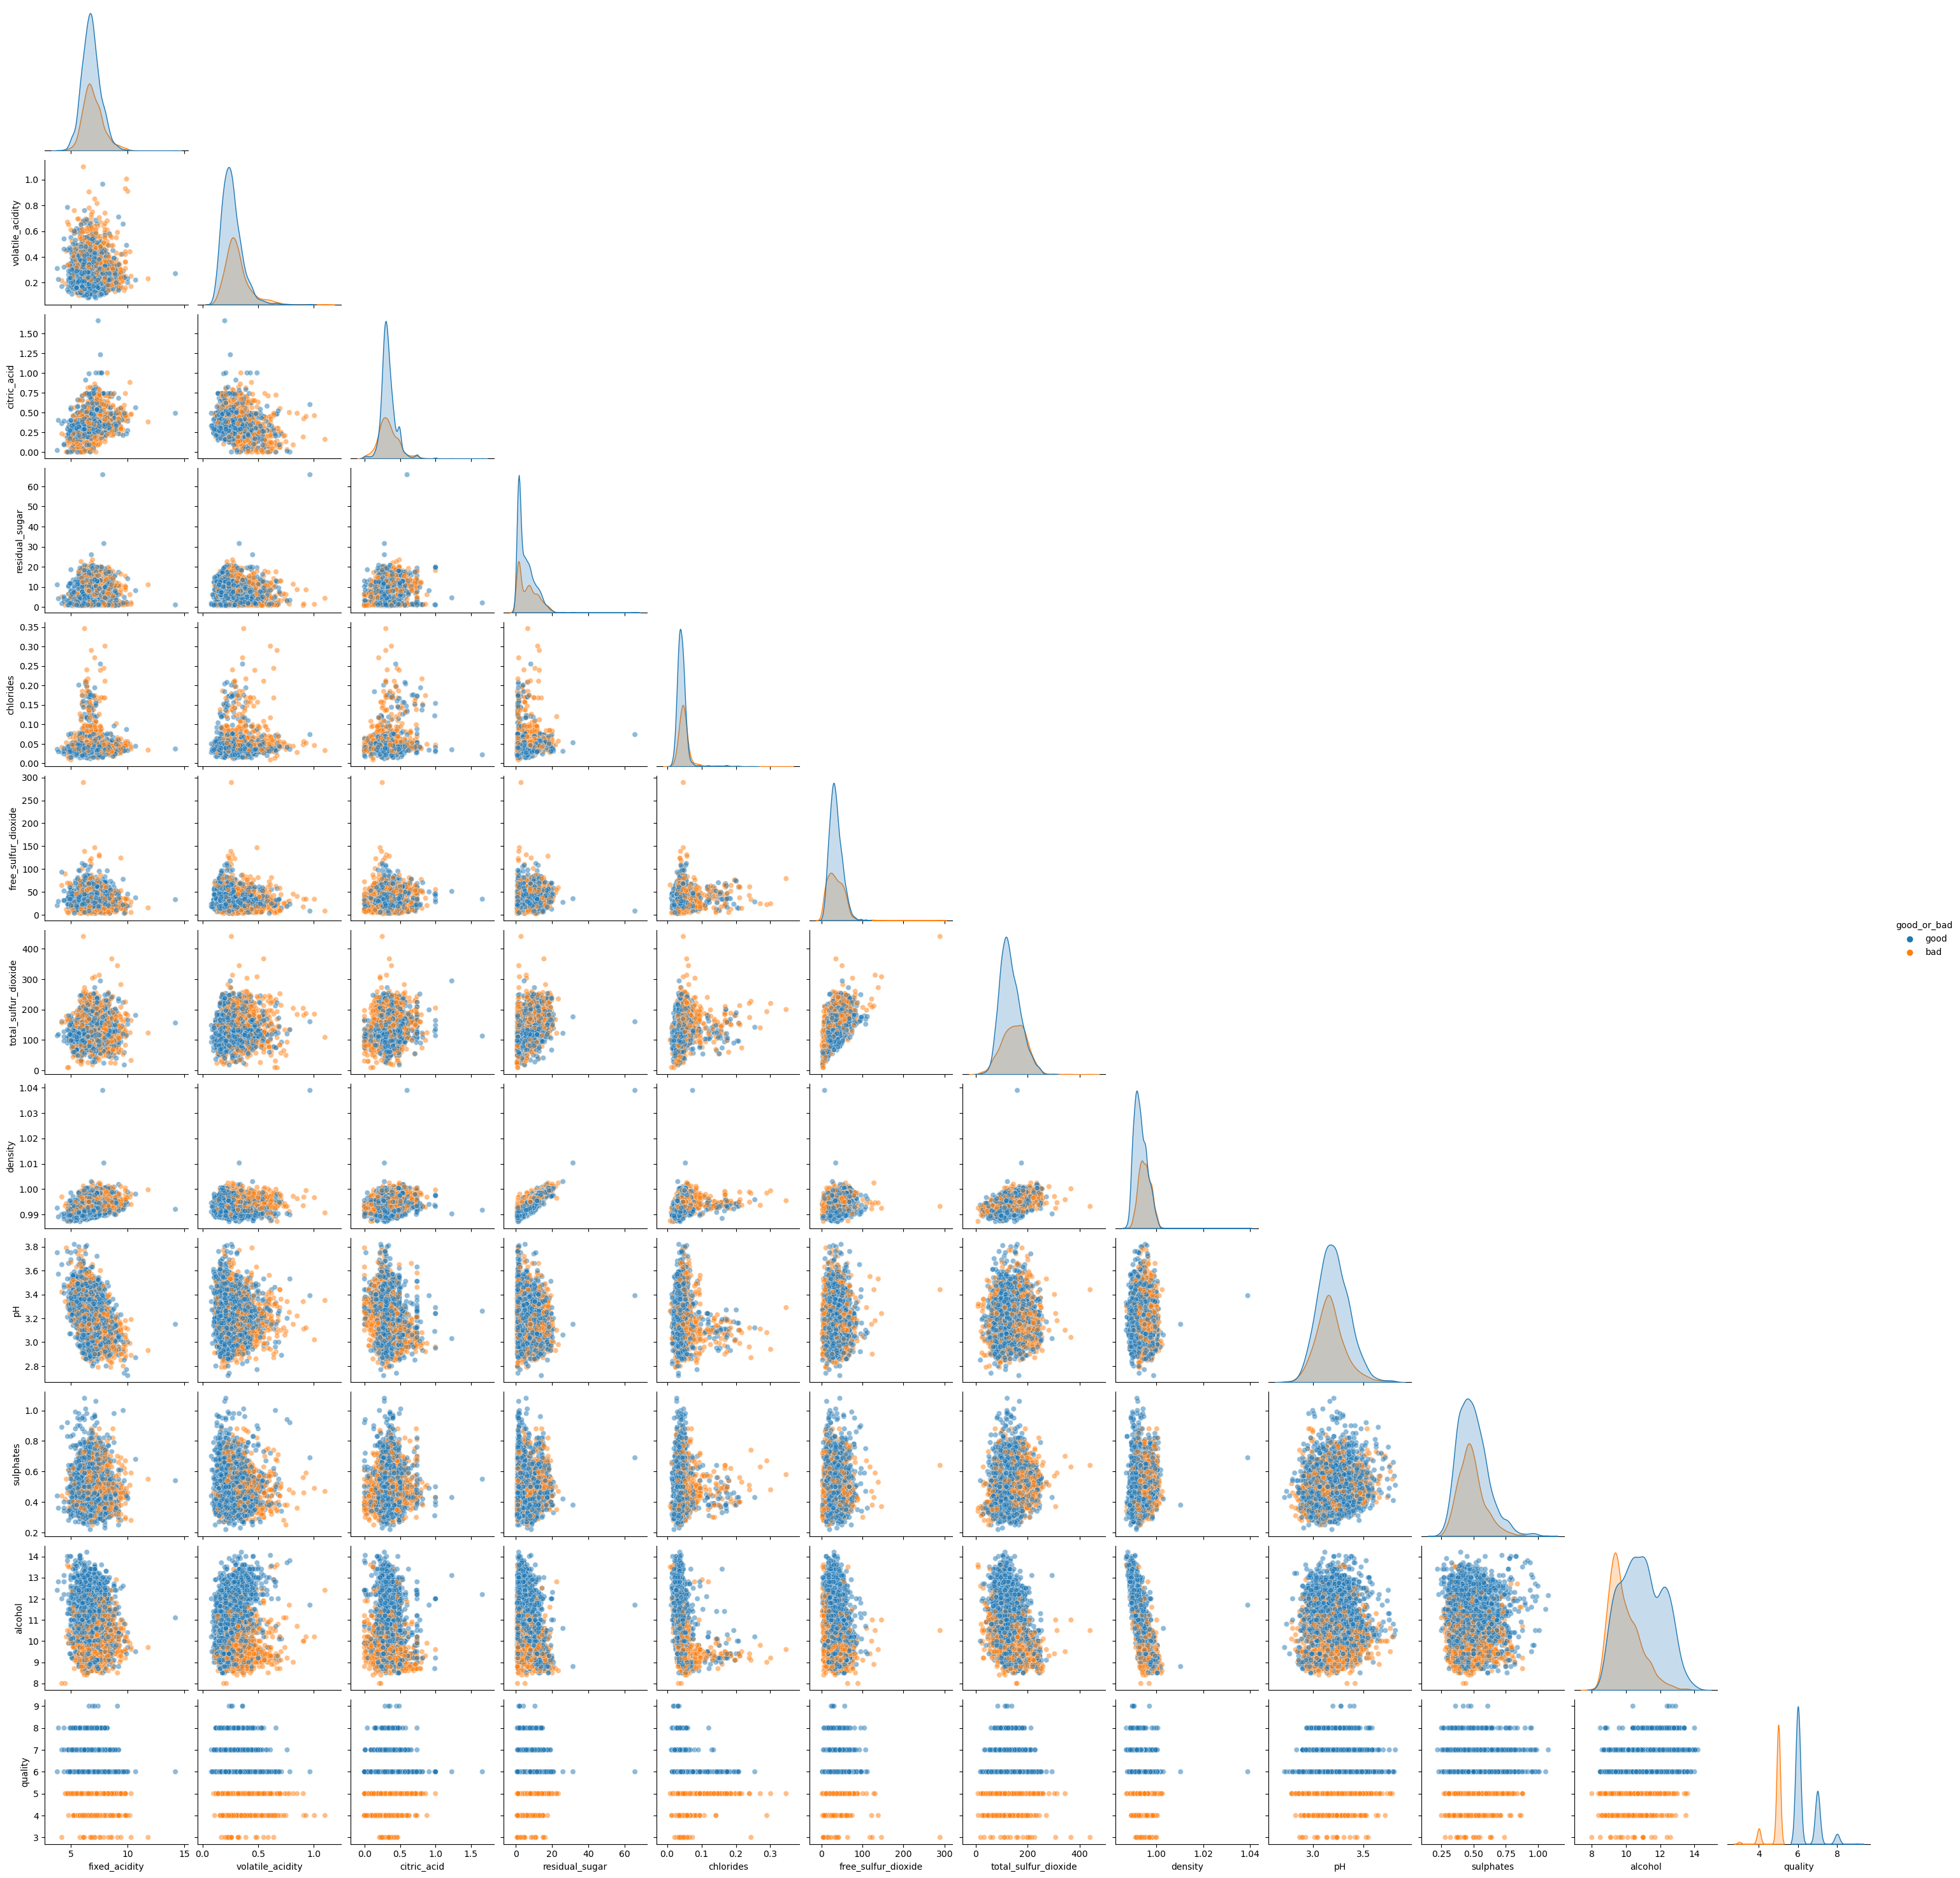

In [27]:
''' lets generate pair plots the white DF and try to see if there are commonalities with the shit wine to identify them'''
sns.pairplot(white_copy, hue= 'good_or_bad', plot_kws={'alpha': 0.5}, corner = True)
plt.show()

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good_or_bad'],
      dtype='object')
fixed_acidity
volatile_acidity
citric_acid
residual_sugar
chlorides
free_sulfur_dioxide
total_sulfur_dioxide
density
pH
sulphates
alcohol
quality


IndexError: index 11 is out of bounds for axis 0 with size 11

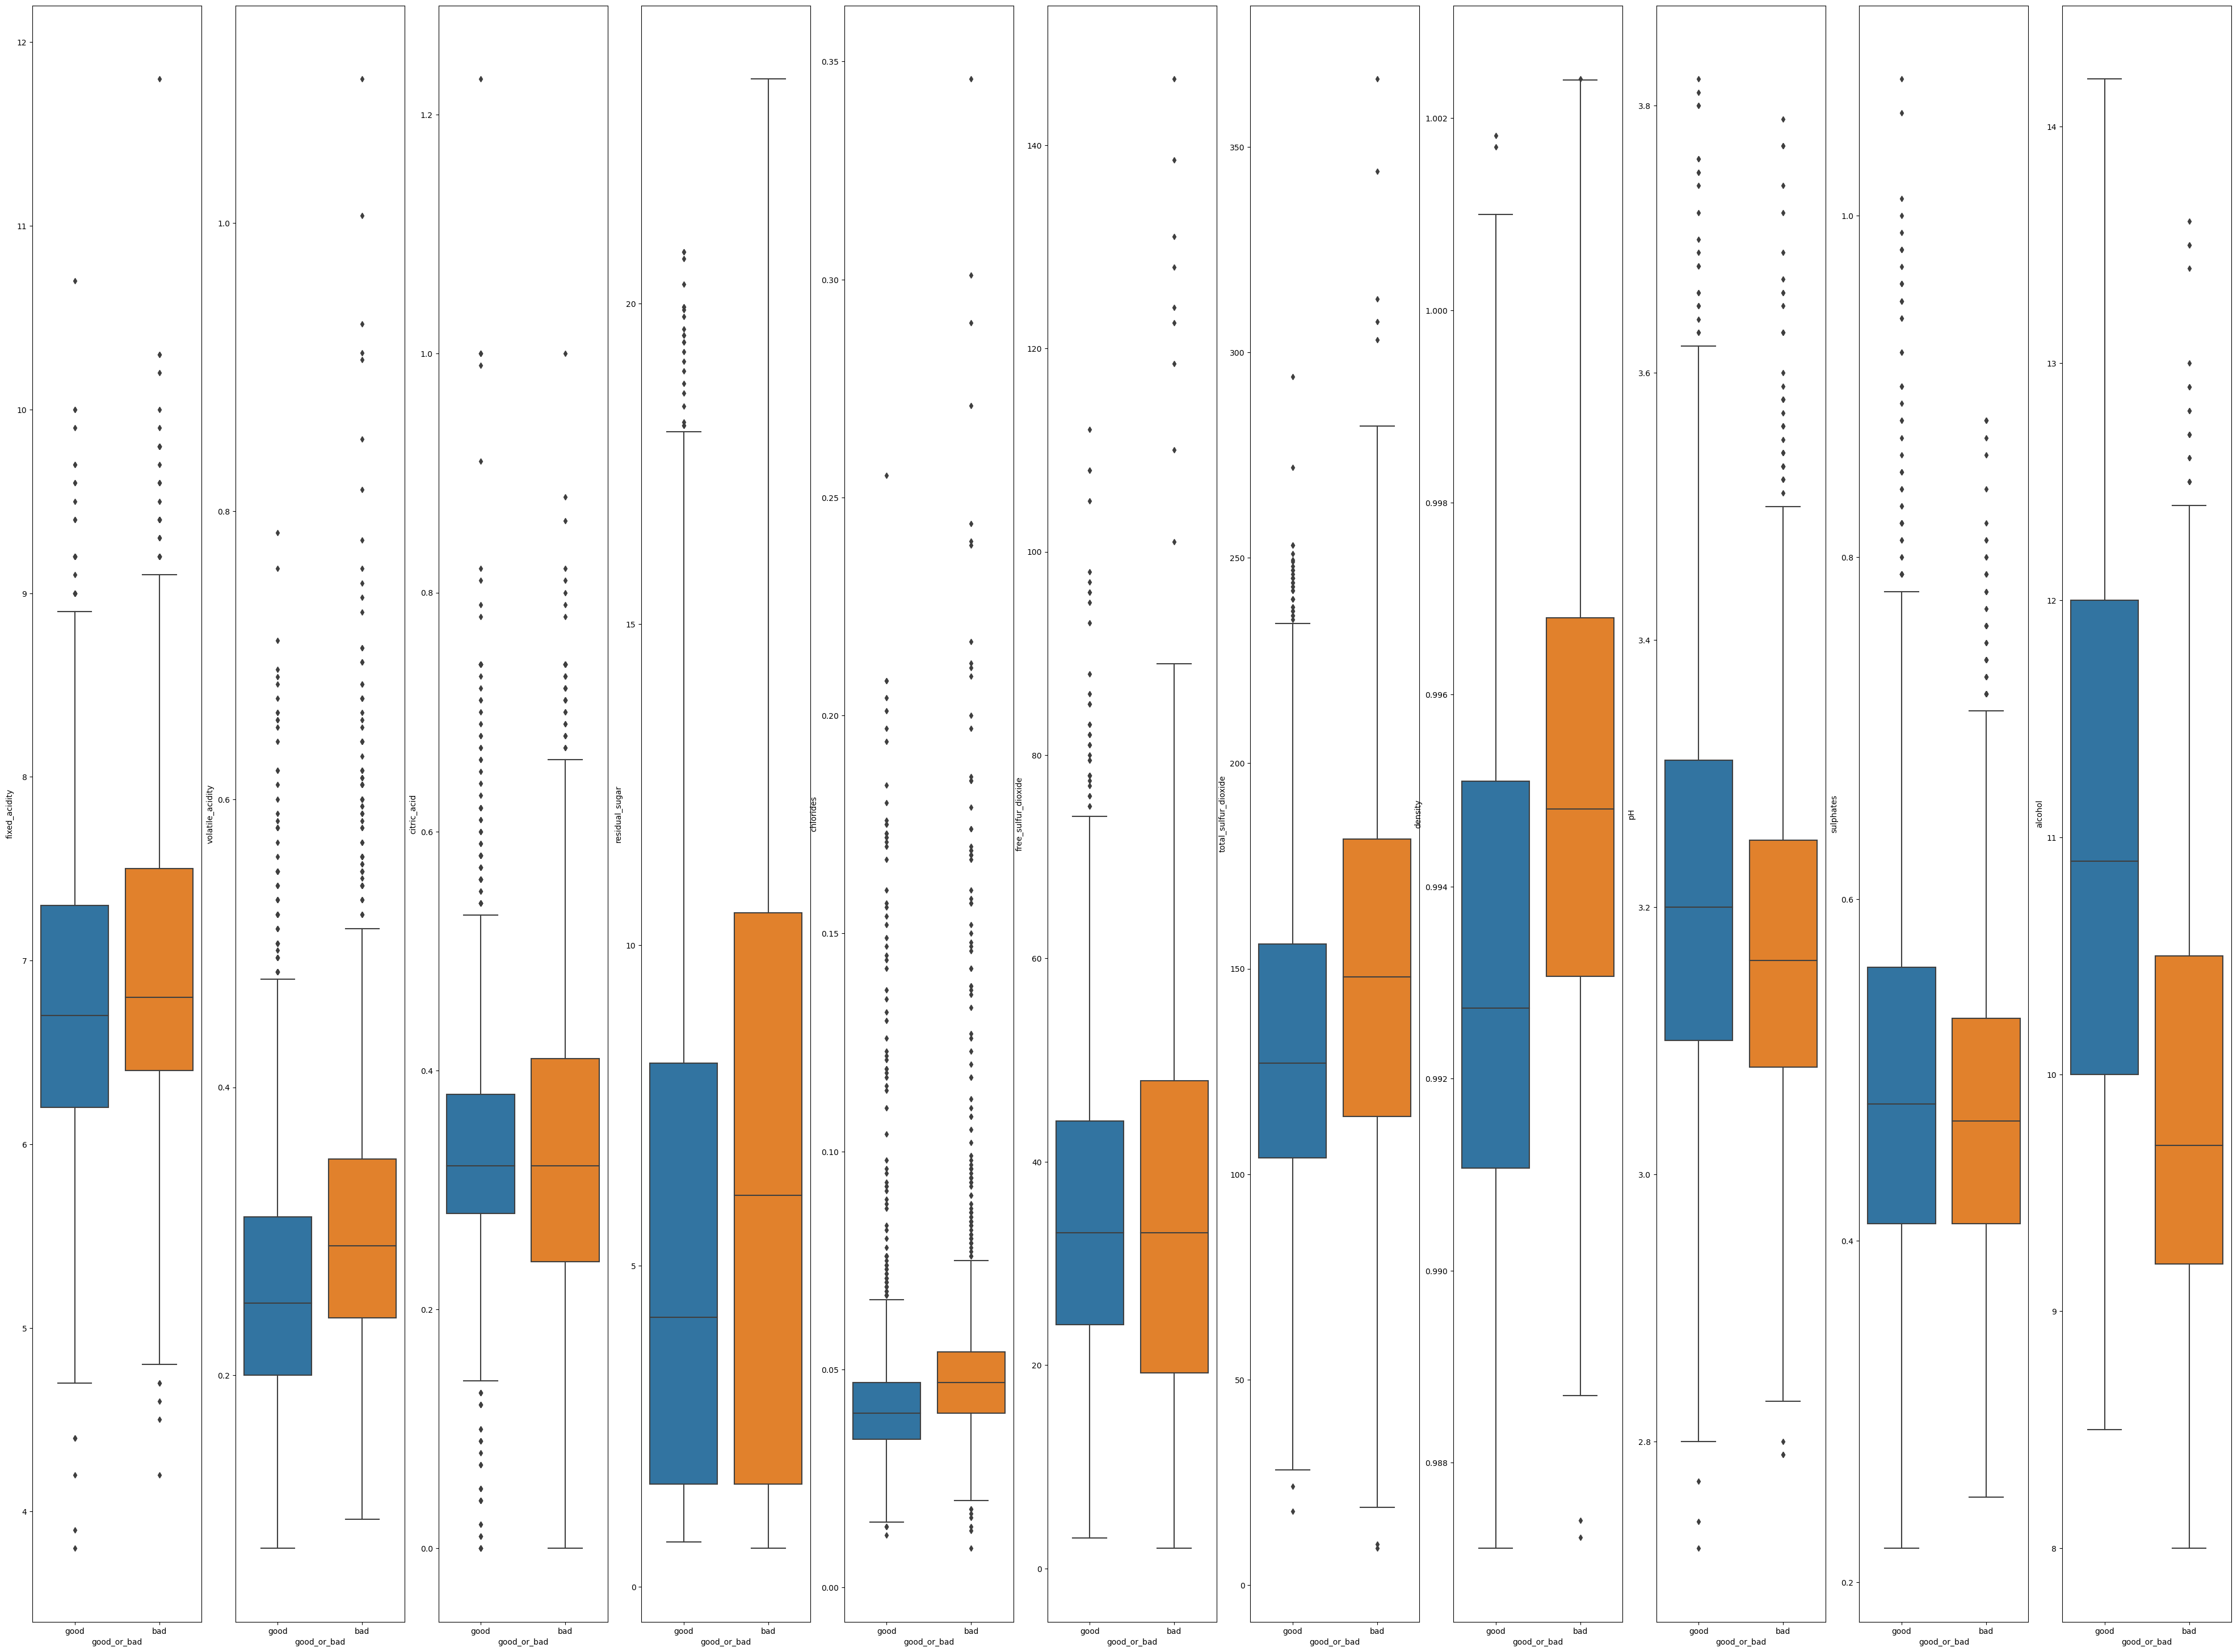

In [49]:
print(white_copy.columns)
fig, axs = plt.subplots(1, len(white_copy.columns) -2, figsize=(50, 37))
for val in range(len(white_copy.columns) -1):
    df_column = white_copy.columns[val]
    print(df_column)
    fig = sns.boxplot(x= white_copy.good_or_bad, y= white_copy[df_column], ax = axs[val])
plt.tight_layout()
plt.show()

OUTLIERS

In [47]:
display(white_copy.sort_values(by='residual_sugar', ascending = False).head())

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,good_or_bad
3619,6.8,0.45,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6,good
1608,6.9,0.27,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5,bad
4480,5.9,0.22,0.45,22.60,0.120,55.0,122.0,0.99636,3.10,0.35,12.8,5,bad
182,6.8,0.28,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5,bad
3730,6.2,0.22,0.20,20.80,0.035,58.0,184.0,1.00022,3.11,0.53,9.0,6,good


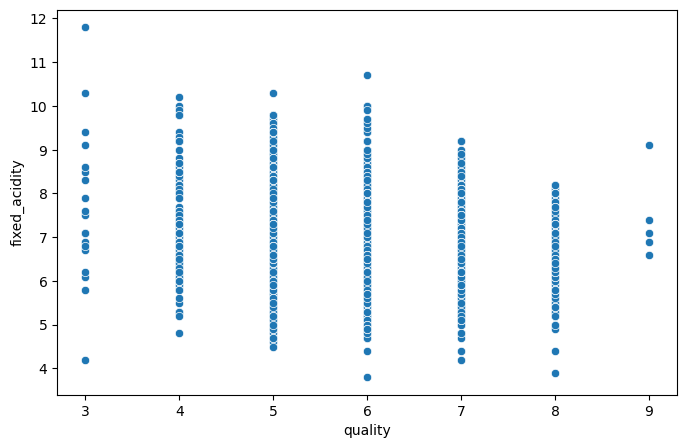

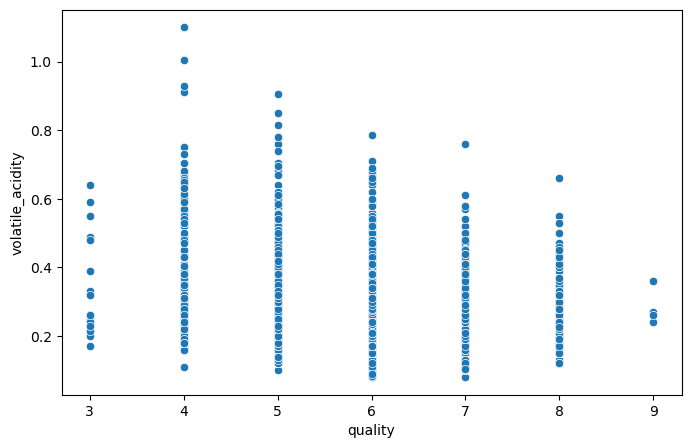

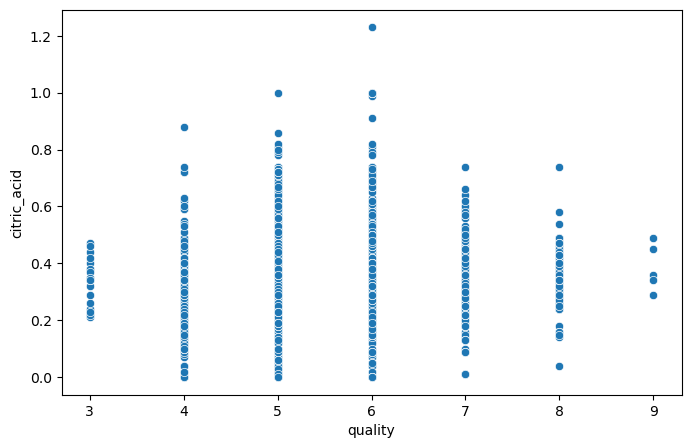

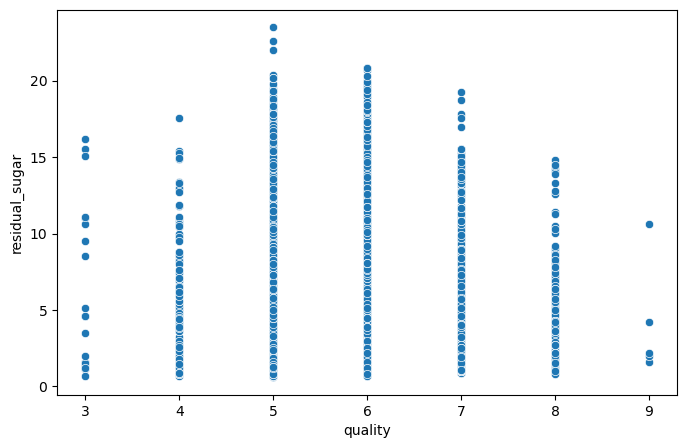

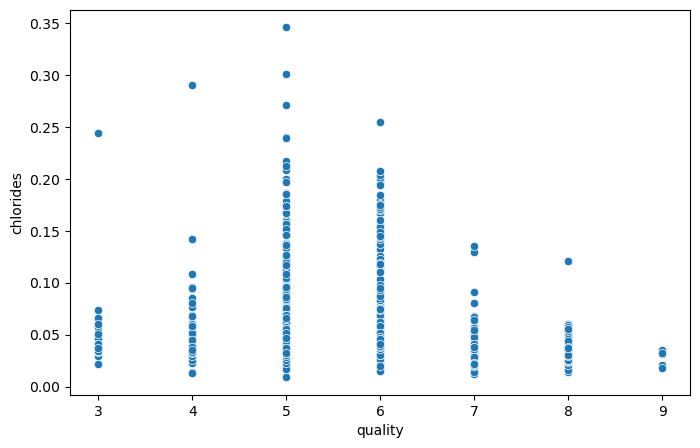

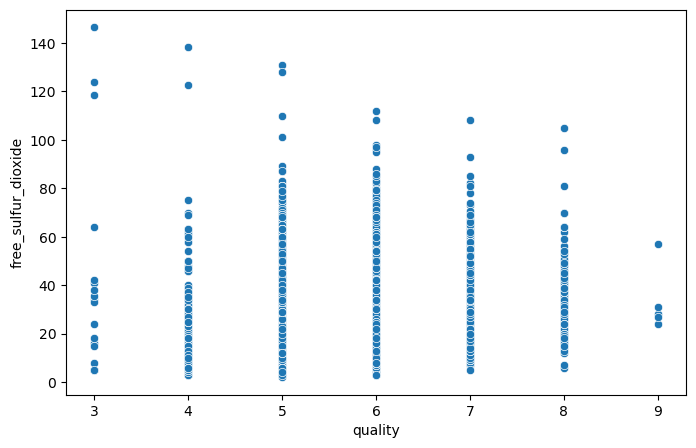

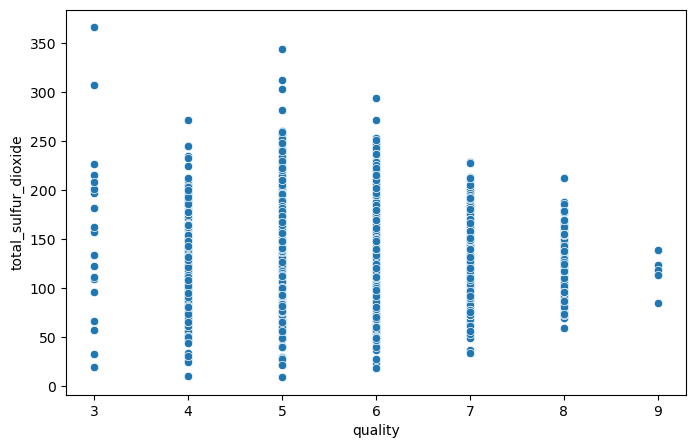

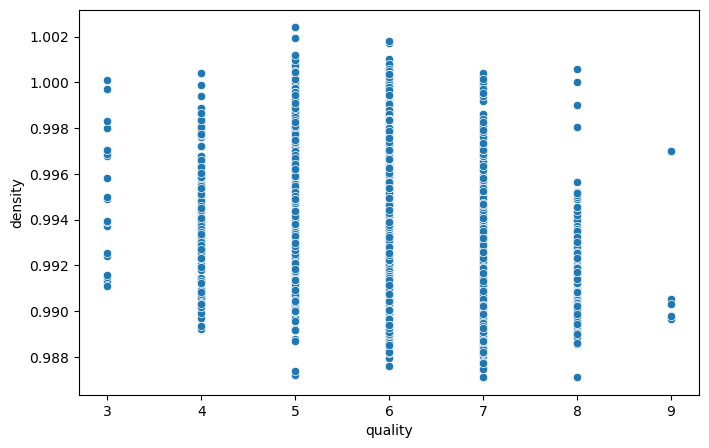

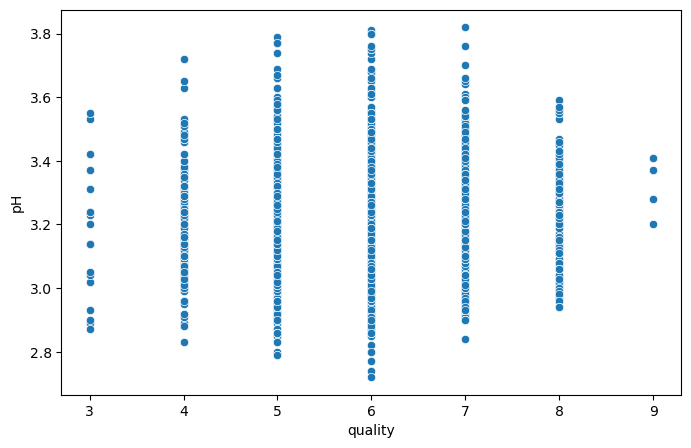

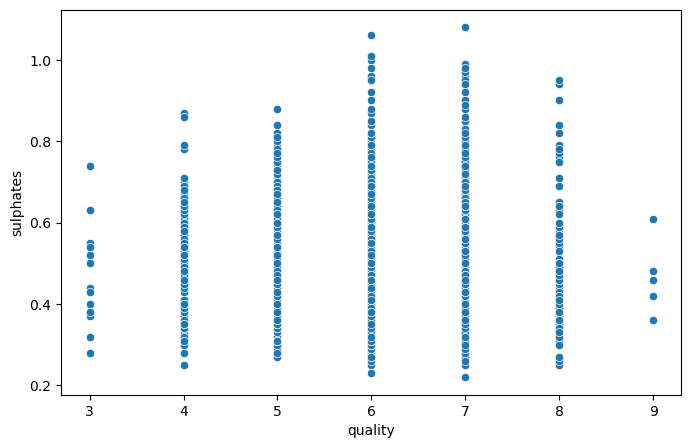

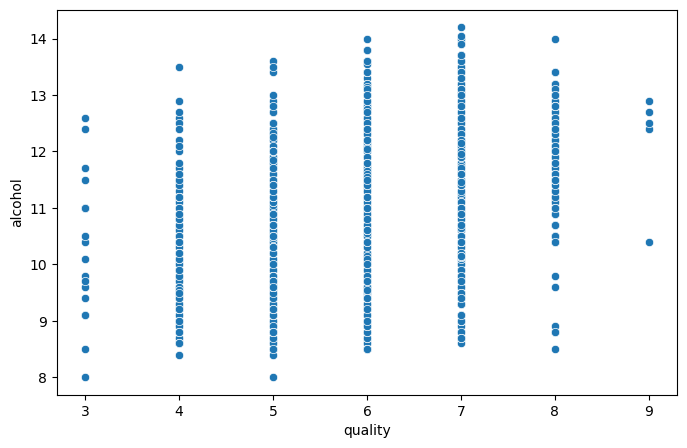

In [87]:
column_list = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for val in column_list:
    fig, axs = plt.subplots(1, 1, figsize=(8, 5))
    sns.scatterplot(data= white_copy, y = val, x = 'quality')
    plt.show()

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good_or_bad',
       'quality_label'],
      dtype='object')


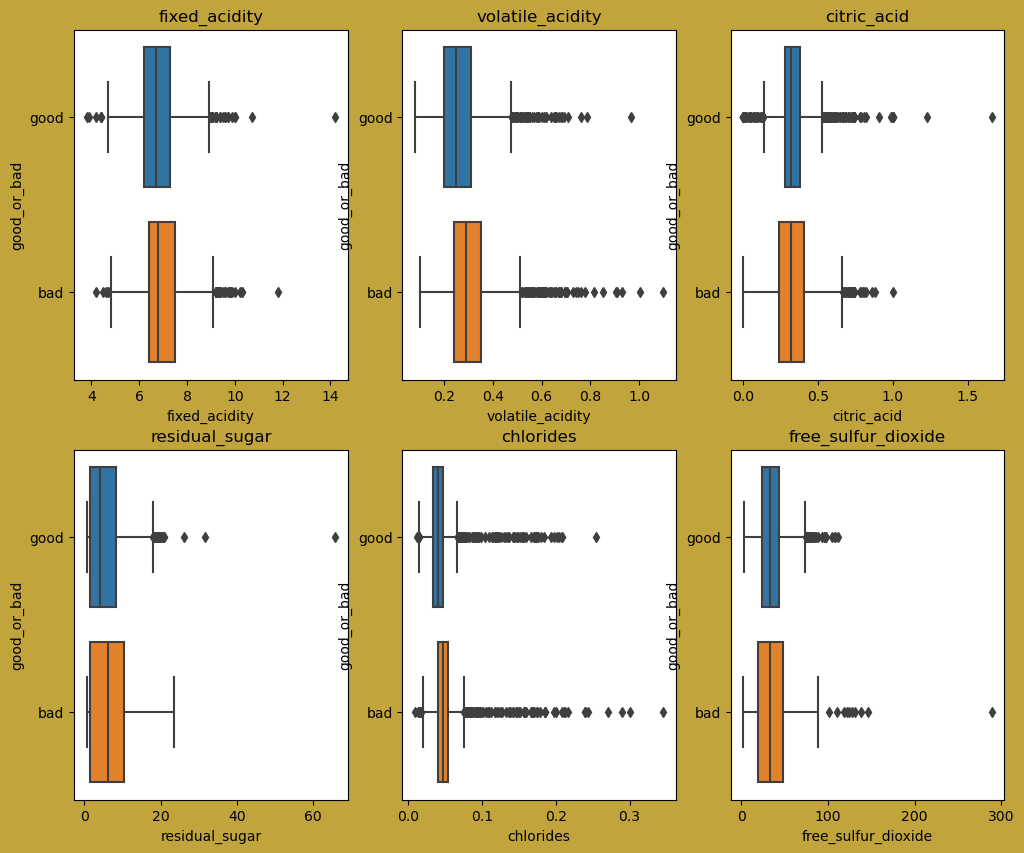

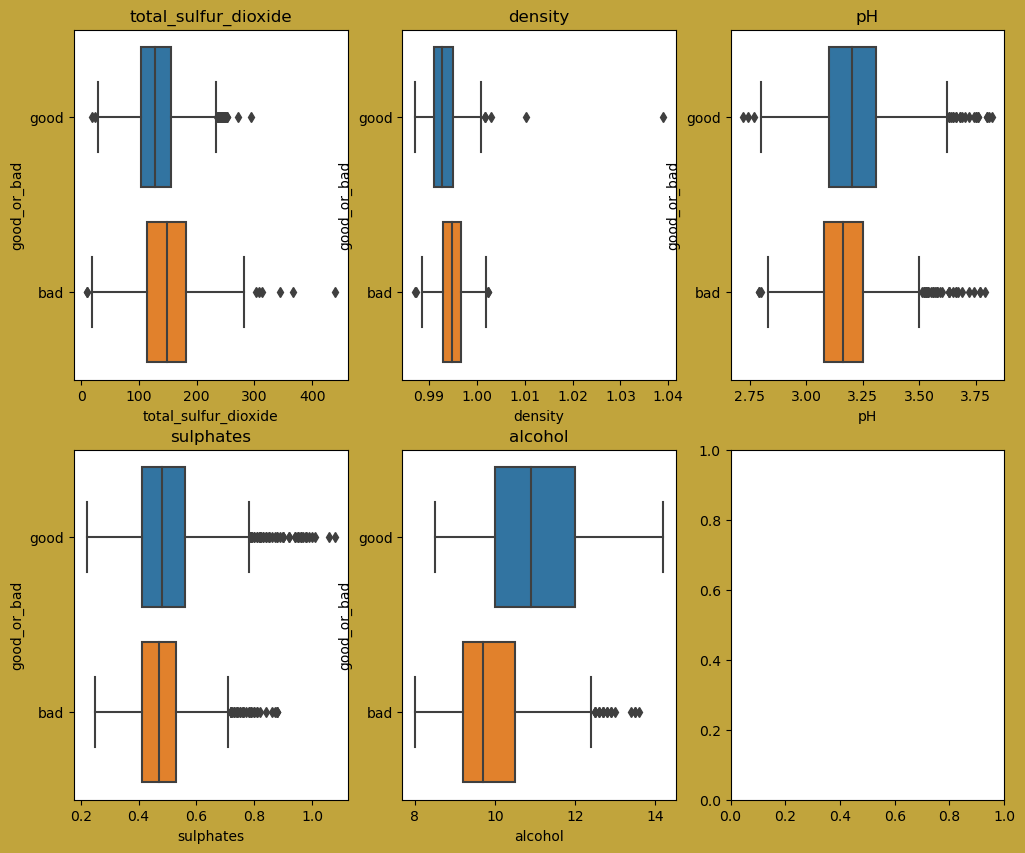

In [92]:
def boxplot_generator3(lst_cols):
    num_cols = len(lst_cols)
    
    num_rows = (num_cols //3) + (num_cols %2)
    fig, axs = plt.subplots(num_rows, 3, figsize = (12, 5 *num_rows))
    fig.set_facecolor(white_color)
    axs = axs.flatten()
    for i, var_of_i in enumerate(lst_cols):
        ax = axs[i]
        sns.boxplot(x = white_copy[var_of_i], y = white_copy.good_or_bad, ax = ax)
        #ax.set_facecolor(red_color)
        ax.set_title(f'{var_of_i}')    

print(white_copy.columns)
col_of_interest = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol',]
boxplot_generator3(col_of_interest[:6])
boxplot_generator3(col_of_interest[6:])